# Lesson 3 Codealong
Instructor: Amy Roberts, PhD

In [1]:
#General imports
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Part 1. Basic Stats
	
    Methods available include: 
		.min() - Compute minimum value
		.max() - Compute maximum value
		.mean() - Compute mean value
		.median() - Compute median value
        .mode() - Compute mode value(s)
		.count() - Count the number of observations

#### Read in the examples

In [2]:
df = pd.DataFrame({'example1' : [18, 24, 17, 21, 24, 16, 29, 18], 'example2' : [75, 87, 49, 68, 75, 84, 98, 92], 'example3' : [55, 47, 38, 66, 56, 64, 44, 39] })
print(df)


   example1  example2  example3
0        18        75        55
1        24        87        47
2        17        49        38
3        21        68        66
4        24        75        56
5        16        84        64
6        29        98        44
7        18        92        39


#### Instructor example: Calculate the mean for each coloumn

In [3]:
df.mean()

example1    20.875
example2    78.500
example3    51.125
dtype: float64

#### Students: Calculate median, mode, max, min for example

Note: All answers should match your hand calculations

In [4]:
#maximum
df.max()

example1    29
example2    98
example3    66
dtype: int64

In [5]:
#minimum
df.min()

example1    16
example2    49
example3    38
dtype: int64

In [6]:
#median
df.median()

example1    19.5
example2    79.5
example3    51.0
dtype: float64

In [7]:
#mode
df.mode()

,example1,example2,example3
0,18.0,75.0,38
1,24.0,NaN,39
2,NaN,NaN,44
3,NaN,NaN,47
4,NaN,NaN,55
5,NaN,NaN,56
6,NaN,NaN,64
7,NaN,NaN,66


### Part 2. Box Plot

#### Instructor: Interquartile range 

In [8]:
print("50% Quartile:")
print(df.quantile(.50))
print("\nMedian (red line of the box)")
print(df.median())

50% Quartile:
example1    19.5
example2    79.5
example3    51.0
Name: 0.5, dtype: float64

Median (red line of the box)
example1    19.5
example2    79.5
example3    51.0
dtype: float64


In [11]:
df.sort_values(by='example1')

,example1,example2,example3
5,16,84,64
2,17,49,38
0,18,75,55
7,18,92,39
3,21,68,66
1,24,87,47
4,24,75,56
6,29,98,44


In [12]:
print("25% (bottom of the box)")
print(df.quantile(0.25,interpolation ='linear')) #midpoint
print("\n75% (top of the box)")
print(df.quantile(0.75))

25% (bottom of the box)
example1    17.75
example2    73.25
example3    42.75
Name: 0.25, dtype: float64

75% (top of the box)
example1    24.00
example2    88.25
example3    58.00
Name: 0.75, dtype: float64


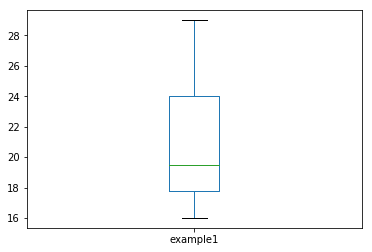

In [13]:
df['example1'].plot(kind='box')

#### Student: Create plots for examples 2 and 3 and check the quartiles

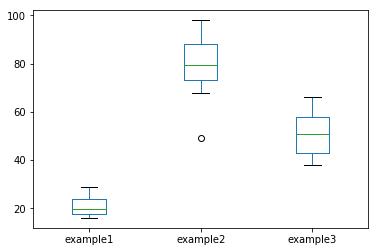

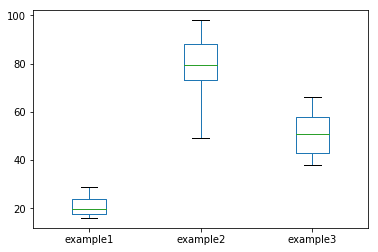

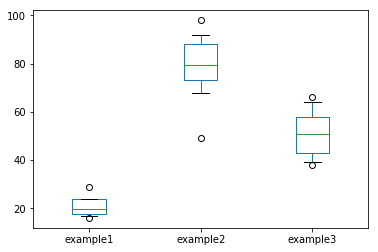

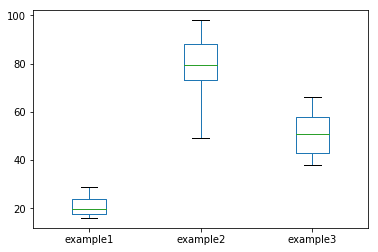

In [20]:
df.plot(kind="box")
df.plot(kind="box",whis='range') #plot the whiskers at the min and max
df.plot(kind="box",whis=[5,95]) #plot the whiskers at 5th and 95th percentile
df.plot(kind="box",whis=20) #plot the whiskers at the values which fall within 20 std of the mean

#### What does the cross in example 2 represent?

Answer: outlier - depending on which function you chose to define your outliers by

### Part 3. Standard Deviation and Variance

**Variance:** The variance is how much the predictions for a given point vary between different realizations of the model.

**Standard Deviation:** The square root of the variance

<img(src='../../assets/images/biasVsVarianceImage.png', style="width: 30%; height: 30%")>

#### In Pandas
	Methods include: 
		.std() - Compute Standard Deviation
		.var() - Compute variance

#### Let's calculate variance by hand first. 
<img(src='../../assets/images/samplevarstd.png', style="width: 50%; height: 50%")>

In [21]:
#example1
mean = df["example1"].mean()
n= df["example1"].count()

print(df["example1"])
print(mean)
print(n)


0    18
1    24
2    17
3    21
4    24
5    16
6    29
7    18
Name: example1, dtype: int64
20.875
8


In [22]:
# written out by hand for instructional purposes 
#if there is time, have the students refactor this to create a function to calculate variance for any dataset
#find the squared distance from the mean

obs0 = (18 - mean)**2
obs1 = (24 - mean)**2
obs2 = (17 - mean)**2
obs3 = (21 - mean)**2
obs4 = (24 - mean)**2
obs5 = (16 - mean)**2
obs6 = (29 - mean)**2
obs7 = (18 - mean)**2

print(obs0, obs1, obs2, obs3, obs4, obs5, obs6, obs7)

#sum each observation's squared distance from the mean 
numerator = obs0 + obs1 + obs2 + obs3 + obs4 + obs5 + obs6 +obs7
denominator = n - 1
variance = numerator/denominator
print(numerator)
print(denominator)
print(variance)



8.265625 9.765625 15.015625 0.015625 9.765625 23.765625 66.015625 8.265625
140.875
7
20.125


In [23]:
# in pandas
print("Variance")
print(df["example1"].var())

Variance
20.125


#### Students: Calculate the standard deviation by hand for each sample

Recall that the standard deviation is the square root of the variance. 

In [24]:
#find the variance for each dataset
df.var()

example1     20.125000
example2    238.571429
example3    116.125000
dtype: float64

In [26]:
#calculate standard deviation by hand
(df.var())**0.5

example1     4.486090
example2    15.445758
example3    10.776131
dtype: float64

In [27]:
#now do it with pandas!
df.std()

example1     4.486090
example2    15.445758
example3    10.776131
dtype: float64

#### Short Cut!

In [28]:
df.describe()

,example1,example2,example3
count,8.00000,8.000000,8.000000
mean,20.87500,78.500000,51.125000
std,4.48609,15.445758,10.776131
min,16.00000,49.000000,38.000000
25%,17.75000,73.250000,42.750000
50%,19.50000,79.500000,51.000000
75%,24.00000,88.250000,58.000000
max,29.00000,98.000000,66.000000


#### Student: Check understanding 
Which value in the above table is the median? 

Answer: 50th percentile

### Part 4: Correlation

In [31]:
df.corr()

,example1,example2,example3
example1,1.000000,0.477283,-0.123745
example2,0.477283,1.000000,-0.057076
example3,-0.123745,-0.057076,1.000000


In [ ]:
http://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm
Skewness = (∑(Y−Ym)3/N)/s3 (Fisher-Pearson coefficient)
                 = ((√N(N−1))/(N-1))*(∑(Y−Ym)3/N)/s3 (Adjusted Fisher-P